## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [7]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Загружаем исходные данные

In [8]:
train_data = np.loadtxt('../../src/digit_vision/train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('../../src/digit_vision/test.csv', delimiter=',', skiprows=1)

## Использование метода опорных векторов и HOG

In [9]:
# Класс-трансформер для извлечения признаков HOG
class HogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3)):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        hog_features = []
        for image in X:
            # Извлекаем признаки HOG изображения
            hog_features.append(hog(image.reshape(28, 28), orientations=self.orientations,
                                    pixels_per_cell=self.pixels_per_cell,
                                    cells_per_block=self.cells_per_block))
        return np.array(hog_features)

# Извлекаем метки классов
y_train = train_data[:, 0]   # Метки классов
# Извлекаем признаки
X_train = train_data[:, 1:]  # Признаки
# Разделяем данные на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Определяем и обучаем модель, используя признаки HOG
hog_pipeline = Pipeline([
    ('hog', HogTransformer()),
    ('svm', SVC())
])

hog_pipeline.fit(X_train, y_train)

# Предсказываем метки классов для обучающей и тестовой выборок
y_train_pred = hog_pipeline.predict(X_train)
y_val_pred = hog_pipeline.predict(X_val)

# Оцениваем производительность модели на обучающей и валидационной выборках
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Accuracy для тренировочного массива:", train_accuracy)
print("Accuracy для валидационного массива:", val_accuracy)

Accuracy для тренировочного массива: 0.9838095238095238
Accuracy для валидационного массива: 0.9713095238095238


## Визуализируем исходные данные и предсказанные метки классов

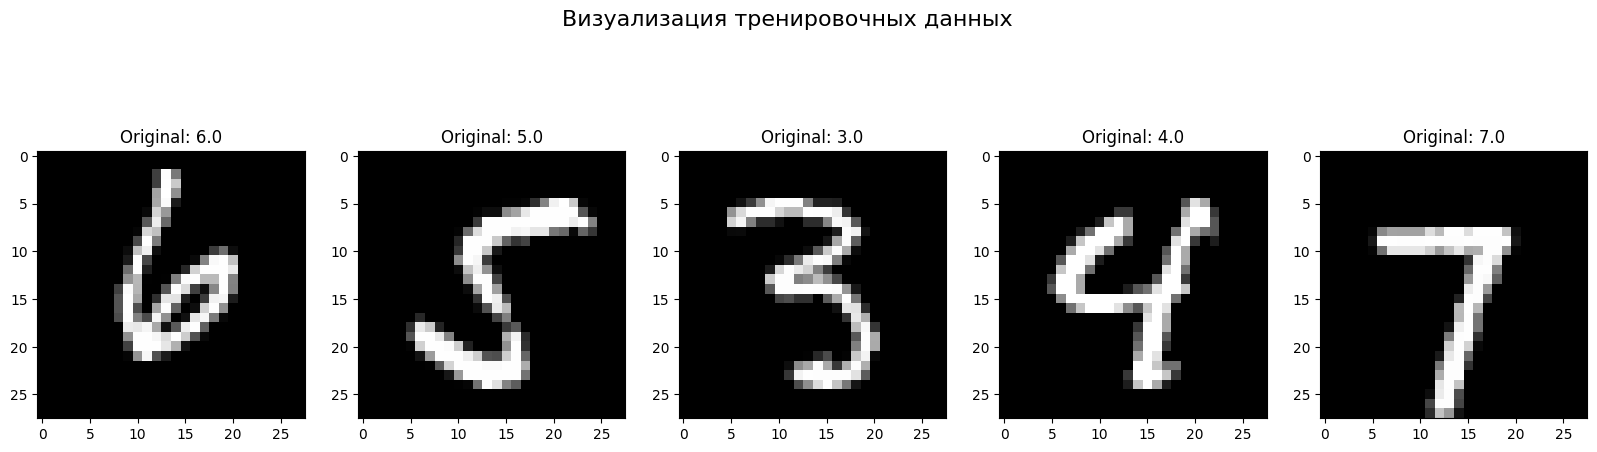

In [10]:
# Создаем фигуру с указанным размером
fig = plt.figure(figsize=(20, 10))

# Визуализируем исходные тестовые данные
for i, img in enumerate(X_train[0:5], 1):
    subplot = fig.add_subplot(2, 5, i)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    subplot.set_title('Original: %s' % y_train[i - 1])

plt.suptitle('Визуализация тренировочных данных', fontsize=16)
plt.show()

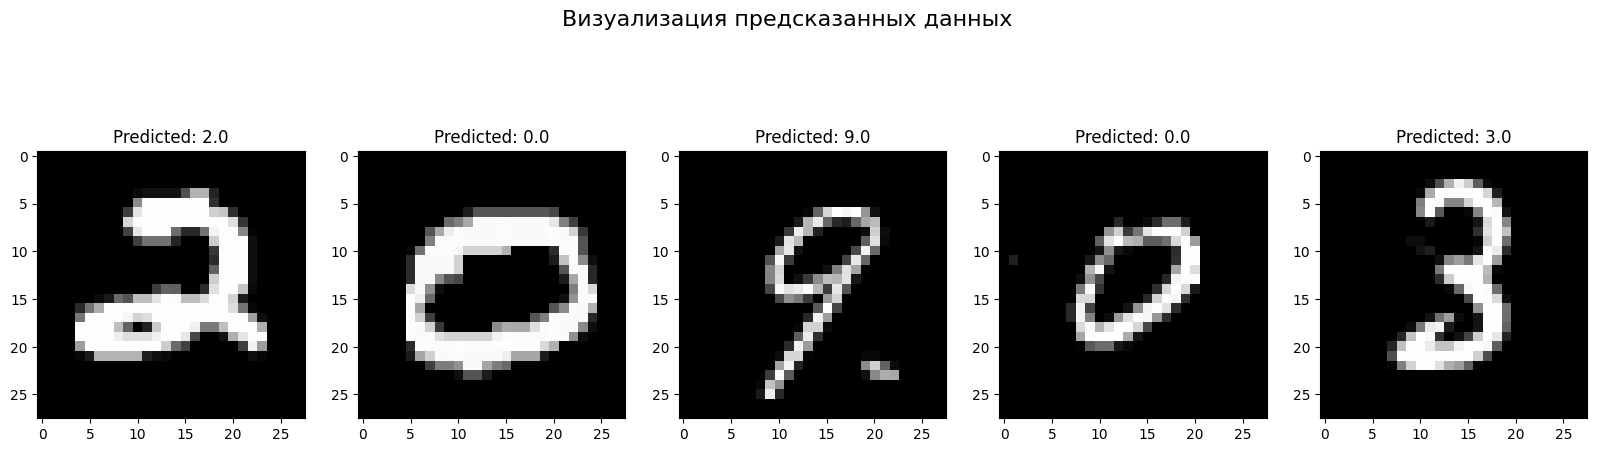

In [11]:
# Извлекаем признаки из тестового набора данных
X_test = test_data
# Предсказываем метки классов для тестовых данных
y_test_pred = hog_pipeline.predict(X_test)
# Создаем фигуру с указанным размером
fig = plt.figure(figsize=(20, 10))

# Визуализируем несколько предсказанных изображений
for i, img in enumerate(X_test[0:5], 1):
    subplot = fig.add_subplot(2, 5, i)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    subplot.set_title('Predicted: %s' % y_test_pred[i - 1])

plt.suptitle('Визуализация предсказанных данных', fontsize=16)
plt.show()

## Готовим файл для отправки

In [14]:
with open('sample_submission.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_test_pred, 1):
        # dst.write('%s,%s\n' % (i, p))
        dst.write('%s,%d\n' % (i, p))

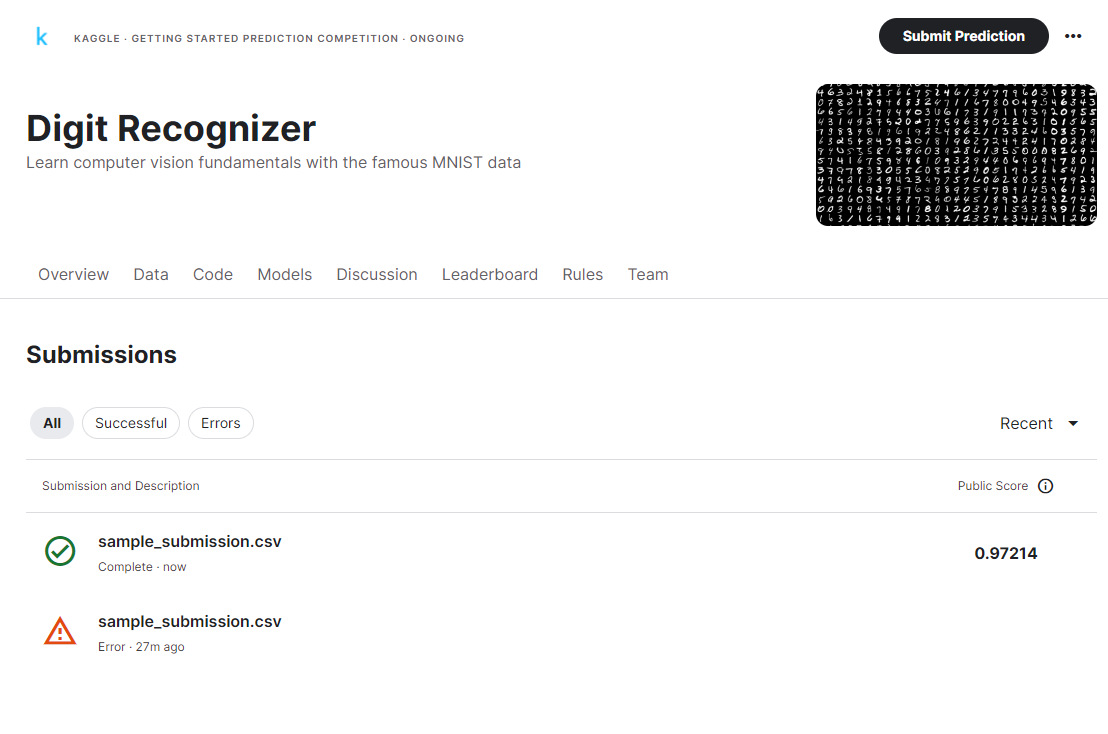

## Вывод

- Использование метода опорных векторов и HOG